In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob           # Allows to list out files within a directory
import os

import librosa                  # Working with audio
import librosa.display
import IPython.display as ipd   # Allows to play audio files in notebook

from itertools import cycle

from datasets import load_dataset

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [21]:
ds = glob('mswc_microset/mswc_microset/*/clips/*/*.opus')

In [22]:
i = 902

# Play audio file i
ipd.Audio(ds[i])

In [23]:
y, sr = librosa.load(ds[i])

In [24]:
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [1.4184700e-34 2.1935969e-34 1.9376229e-34 2.1039315e-34 1.9807029e-34
 2.0781353e-34 1.9987270e-34 2.0643169e-34 2.0099746e-34 2.0547956e-34]
shape y: (22050,)
sr: 22050


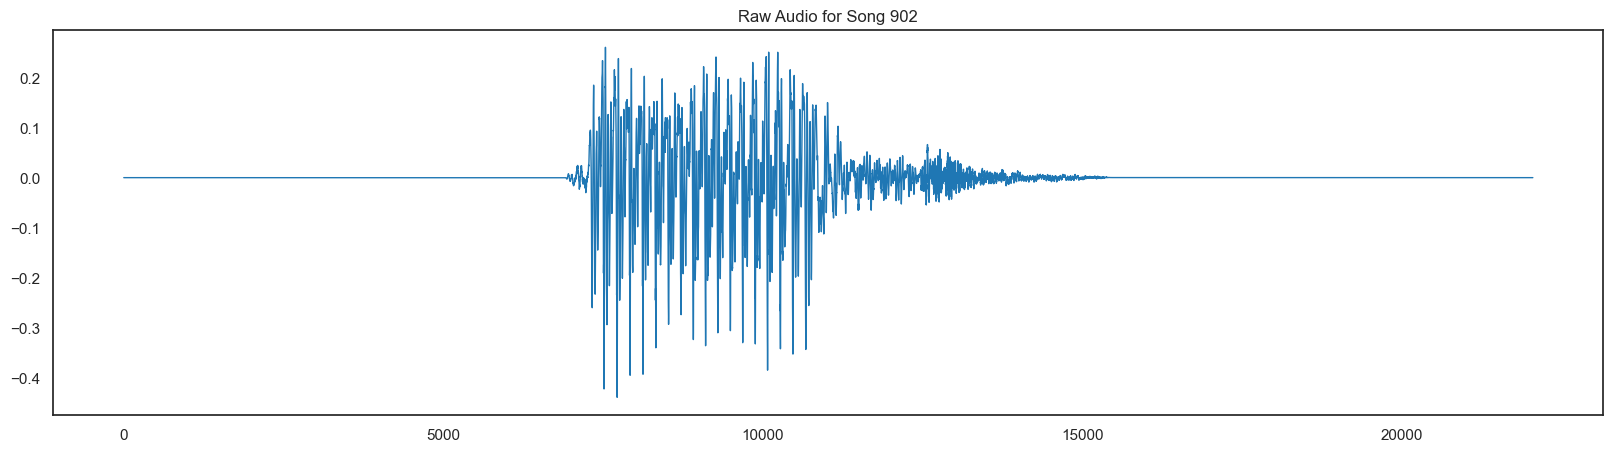

In [25]:
pd.Series(y).plot(figsize=(20, 5),
                  lw=1,
                  title=f"Raw Audio for Song {i}",
                  color=color_pal[0])
plt.show()

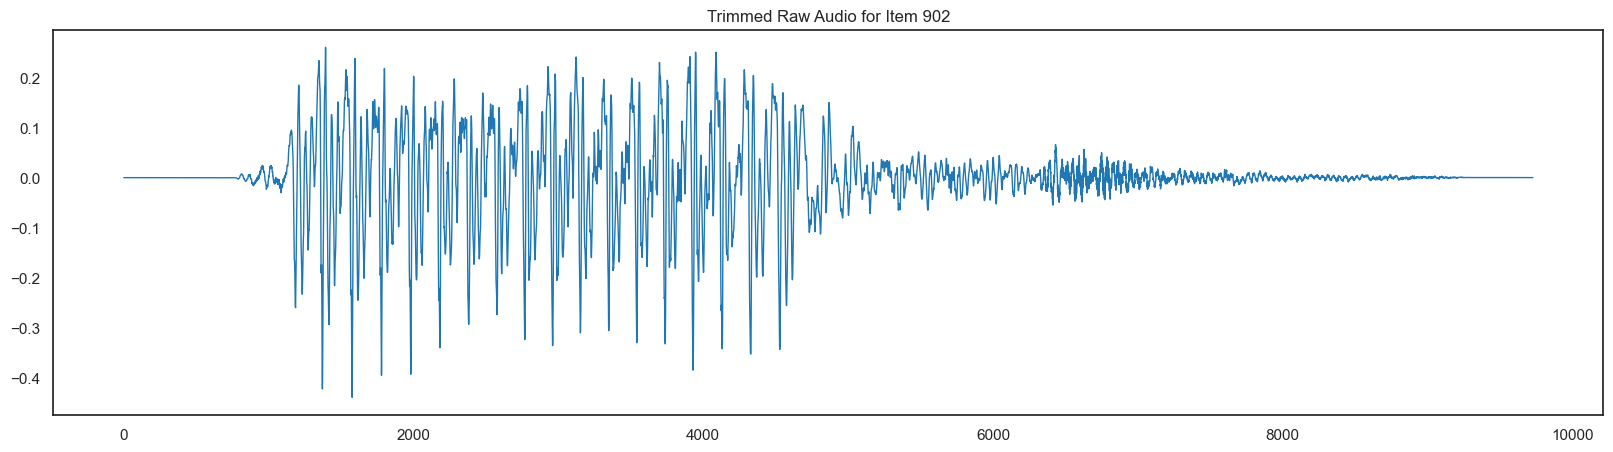

In [26]:
y_trimmed, _ = librosa.effects.trim(y, top_db=40)
pd.Series(y_trimmed).plot(figsize=(20, 5),
                  lw=1,
                  title=f"Trimmed Raw Audio for Item {i}",
                  color=color_pal[0])
plt.show()

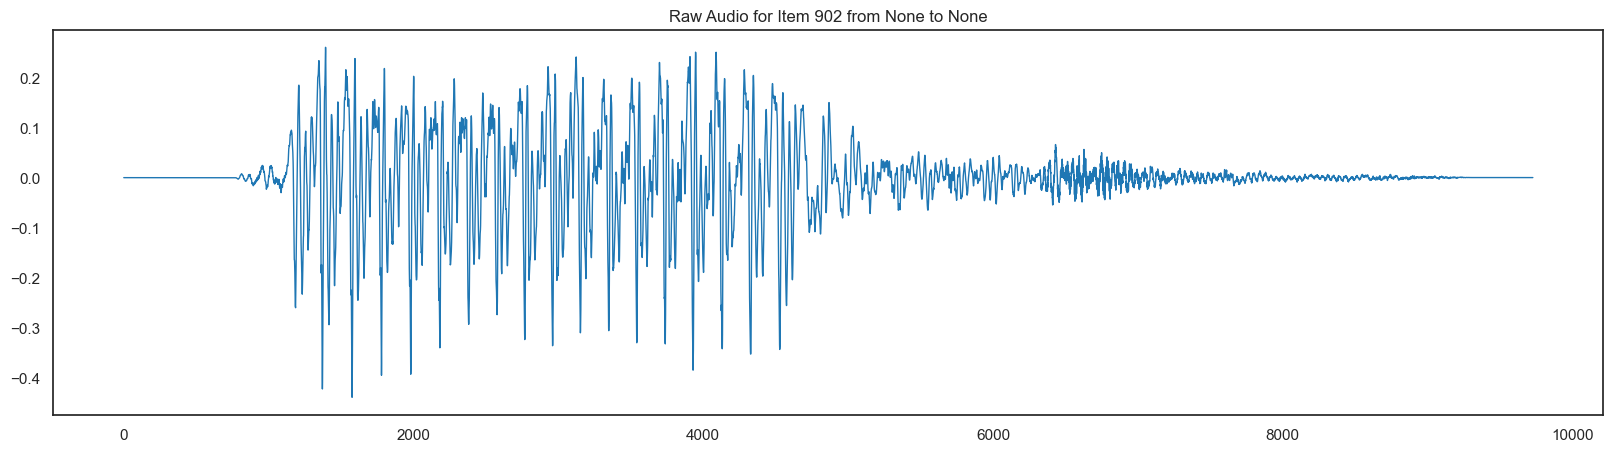

In [27]:
# Raw Audio for Specific Parts of Song
start, end = None, None
pd.Series(y_trimmed[start:end]).plot(figsize=(20, 5),
                  lw=1,
                  title=f"Raw Audio for Item {i} from {start} to {end}",
                  color=color_pal[0])
plt.show()

In [28]:
# Spectogram
D = librosa.stft(y_trimmed)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 20)

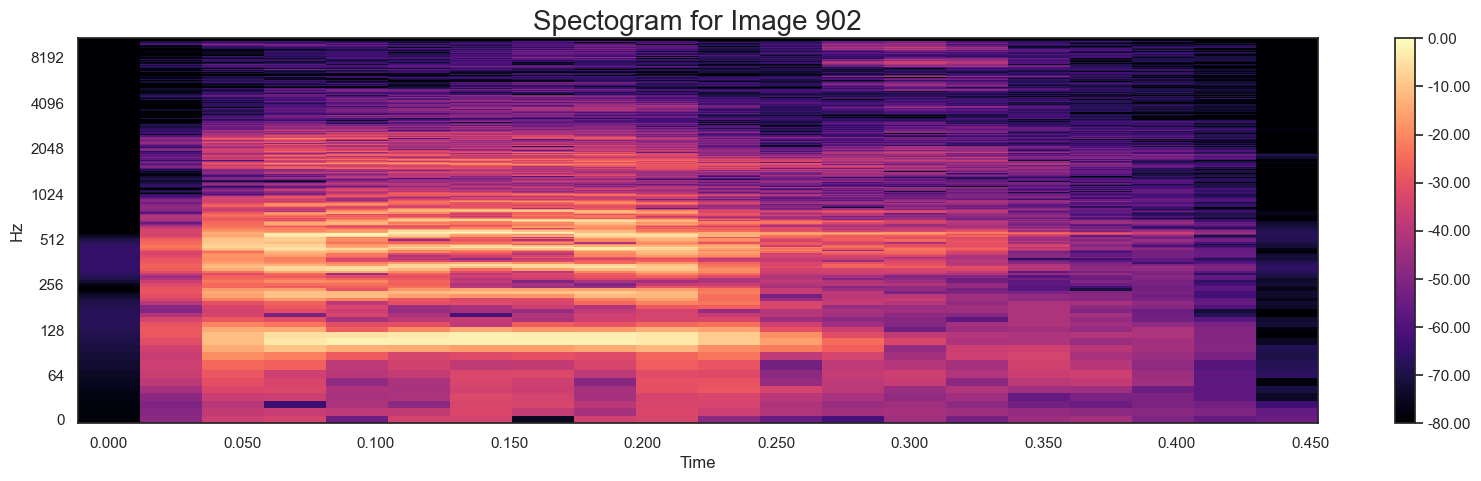

In [29]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(S_db,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title(f'Spectogram for Image {i}', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [30]:
# Mel Spectogram
S = librosa.feature.melspectrogram(y=y_trimmed, sr=sr, n_mels=128 * 2)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

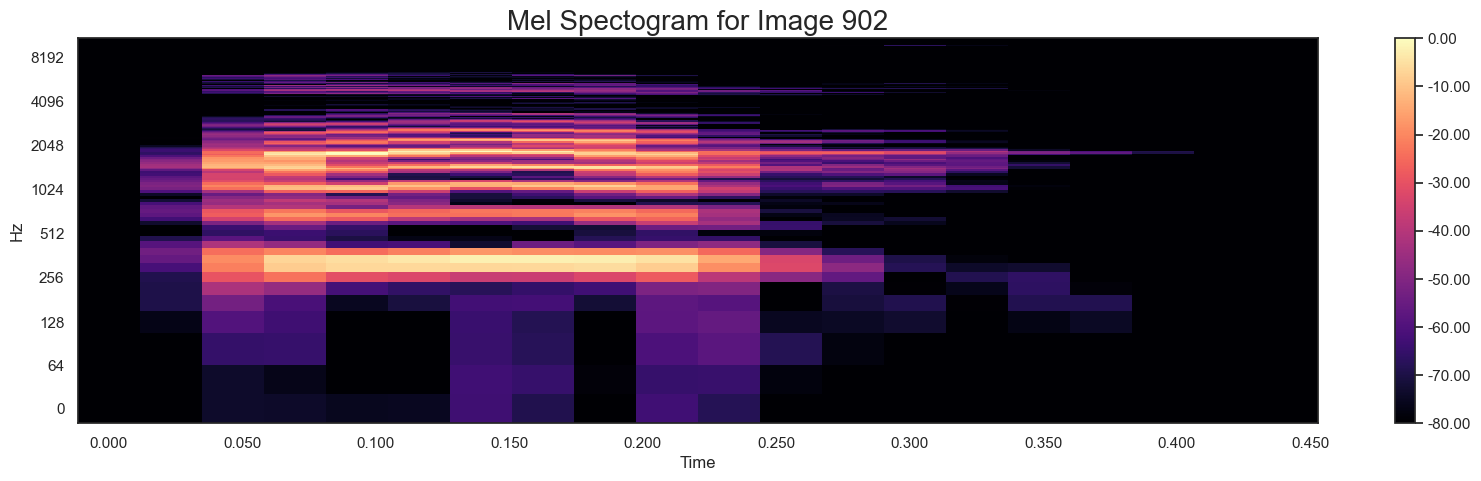

In [31]:
# Plot the Mel Spectogram
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(S_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title(f'Mel Spectogram for Image {i}', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [32]:
# Mel Frequency Cepstral Coefficients (MFCC)
M = librosa.feature.mfcc(y=y_trimmed, sr=sr, n_mels=128)
M_db_mel = librosa.amplitude_to_db(M, ref=np.max)

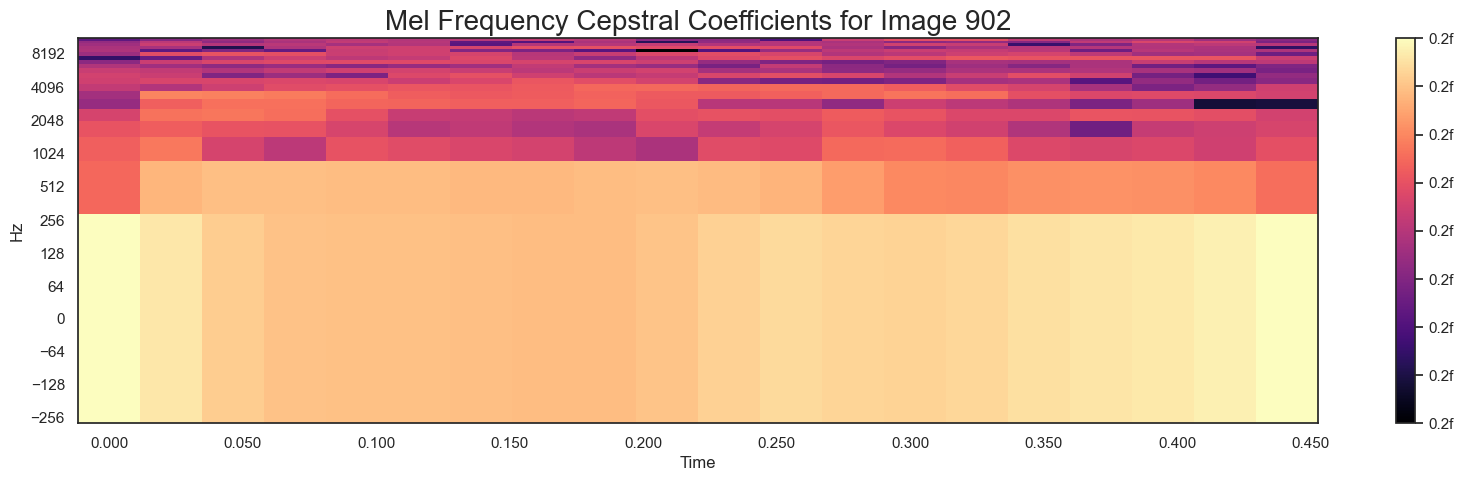

In [33]:
# Plot the MFCC
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(M_db_mel,
                               x_axis='time',
                               y_axis='log',
                               ax=ax)
ax.set_title(f'Mel Frequency Cepstral Coefficients for Image {i}', fontsize=20)
fig.colorbar(img, ax=ax, format=f'0.2f')
plt.show()

In [34]:
# Constant-Q Transform (CQT)
C = librosa.cqt(y=y_trimmed, sr=sr, n_bins=60, bins_per_octave=12)
C_db_mel = librosa.amplitude_to_db(np.abs(C), ref=np.max)

C:\Users\tyree\PycharmProjects\audio-categorizer\.venv\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=256 is too large for input signal of length=152
  warnings.warn(


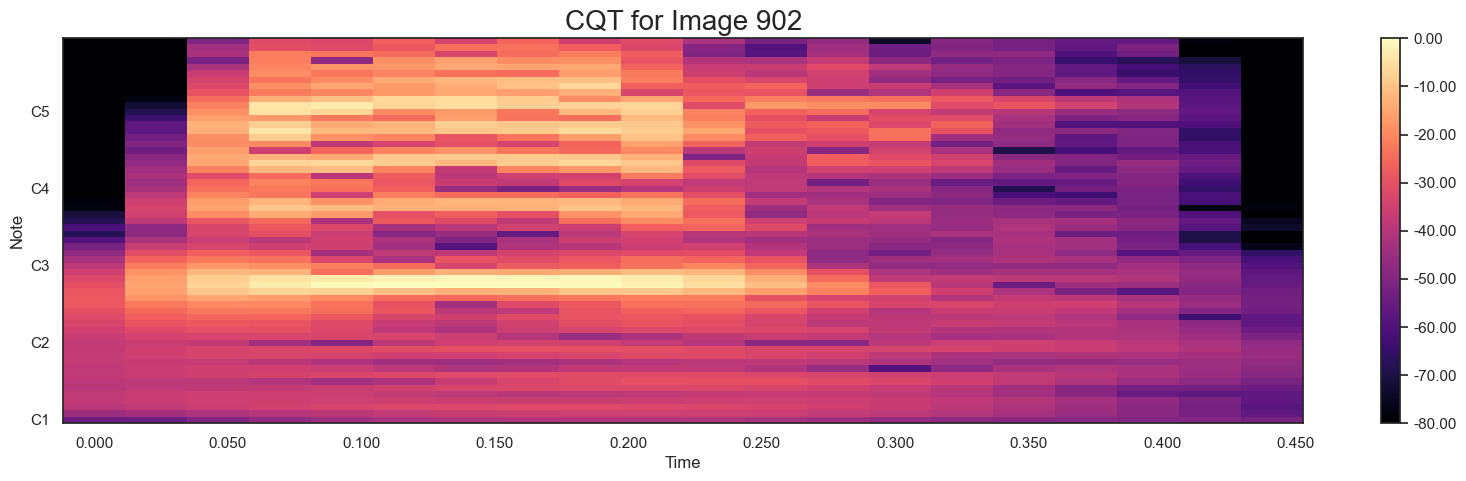

In [35]:
# Plot the CQT
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(C_db_mel, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title(f'CQT for Image {i}', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [36]:
# Construct Chroma Feature Visualization
chroma = librosa.feature.chroma_cqt(C=np.abs(C), sr=sr)

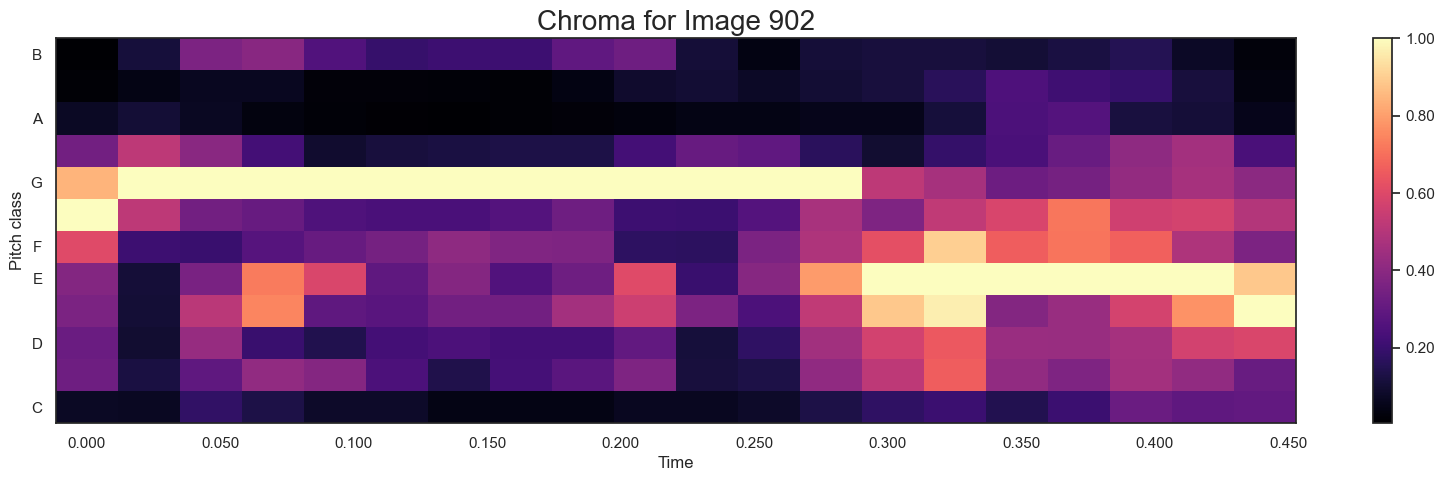

In [37]:
# Plot the Chroma
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax)
ax.set_title(f'Chroma for Image {i}', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()